# IMPORTING THE DATASETS

**Importing Libraries**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-v0_8-darkgrid') # Using a valid seaborn style
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

**Reading Files from GitHub**

In [4]:
url1="https://raw.githubusercontent.com/MansiNandkar/iDruggist/main/heart.csv"
url2="https://raw.githubusercontent.com/MansiNandkar/iDruggist/main/o2Saturation.csv"
df=pd.read_csv(url1)
df1=pd.read_csv(url2)

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**About this dataset**

**Age:** Age of the patient

**Sex:** Sex of the patient

**cp:** Chest Pain type chest pain type
*   Value 1: typical angina
*   Value 2: atypical angina
*   Value 3: non-anginal pain
*   Value 4: asymptomatic

**trtbps:**
resting blood pressure (in mm Hg)

**chol:** cholestoral in mg/dl fetched via BMI sensor

**fbs:**(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg:** resting electrocardiographic results
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalachh:** maximum heart rate achieved

**exng:** exercise induced angina (1 = yes; 0 = no)

**oldpeak:** Previous peak

**slp:** Slope

**caa:** number of major vessels (0-3)

**thal:** Thal rate
* 3 = normal
* 6 = fixed defect
* 7 = reversable defect

**output:**
* 0 = less chance of heart attack
* 1 = more chance of heart attack

In [6]:
df1.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


This talks about the o2 saturation

**Renaming Column 98.6 to Saturation**

In [7]:
df1.rename(columns={"98.6": "Saturation"}, inplace=True)

**Integrating both the datasets**

In [8]:
data = pd.concat([df,df1], axis=1, join="inner")

# EXPLORATORY DATA ANALYSIS

In [9]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [10]:
data.shape

(303, 15)

In [11]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturation
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.480858
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.346740
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trtbps      303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalachh    303 non-null    int64  
 8   exng        303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slp         303 non-null    int64  
 11  caa         303 non-null    int64  
 12  thall       303 non-null    int64  
 13  output      303 non-null    int64  
 14  Saturation  303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 35.6 KB


**Checking null values in columns**

In [13]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [14]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'Saturation'],
      dtype='object')

**Plot of age distribution**

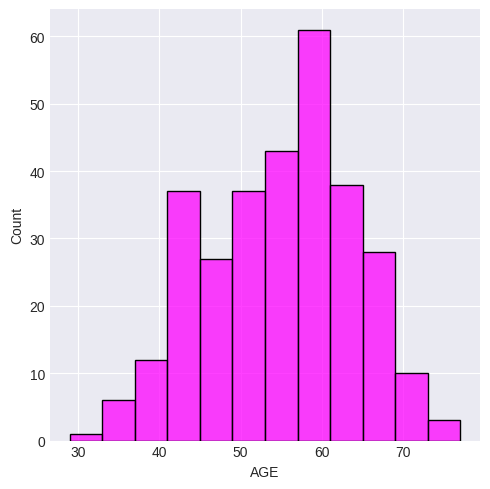

In [15]:
sns.displot(data=data, x="age", color="magenta")
plt.xlabel("AGE")
plt.show()

**Plot of CP distribution**

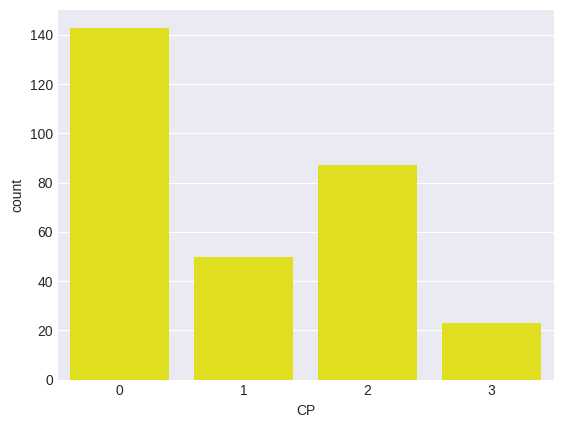

In [16]:
sns.countplot(data=data, x="cp", color="yellow")
plt.xlabel("CP")
plt.show()

**Plot Of Sex distribution**

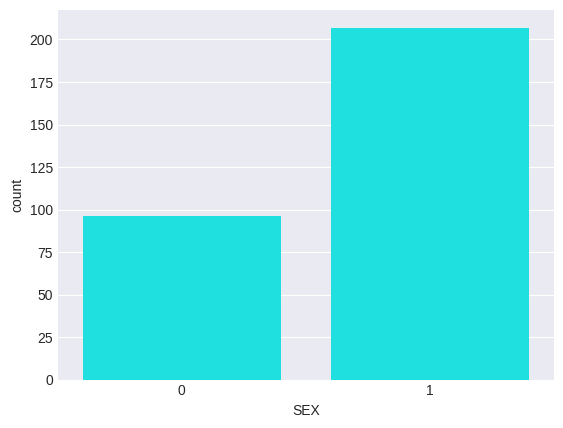

In [17]:
sns.countplot(data=data, x="sex", color="cyan")
plt.xlabel("SEX")
plt.show()

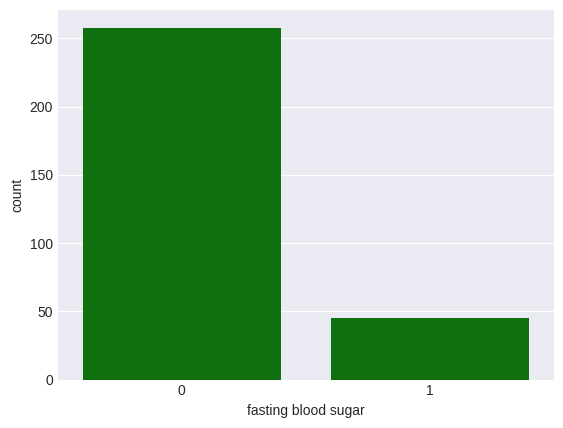

In [18]:
sns.countplot(data=data, x="fbs", color="green")
plt.xlabel("fasting blood sugar")
plt.show()

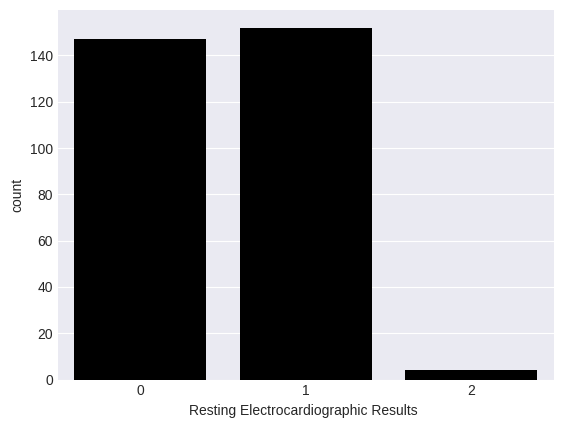

In [19]:
sns.countplot(data=data, x="restecg", color="black")
plt.xlabel("Resting Electrocardiographic Results ")
plt.show()

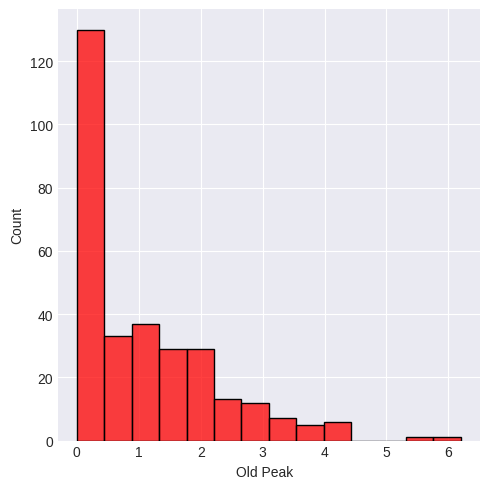

In [20]:
sns.displot(data=data, x="oldpeak", color="red")
plt.xlabel("Old Peak  ")
plt.show()

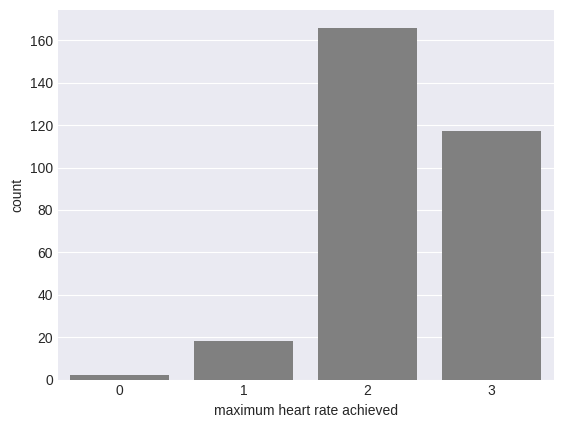

In [21]:
sns.countplot(data=data, x="thall", color="gray")
plt.xlabel("maximum heart rate achieved")
plt.show()

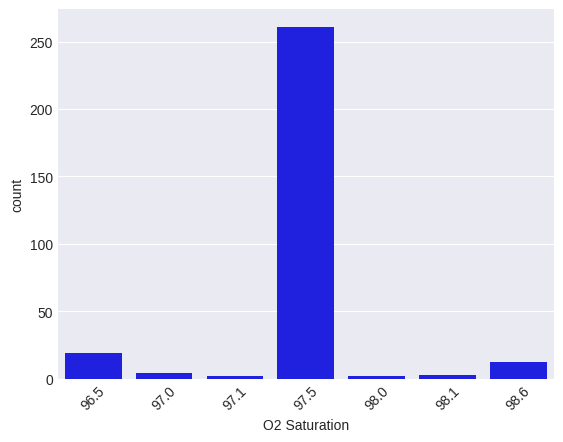

In [22]:
sns.countplot(data=data, x="Saturation", color="blue")
plt.xticks(rotation=45)
plt.xlabel("O2 Saturation")
plt.show()

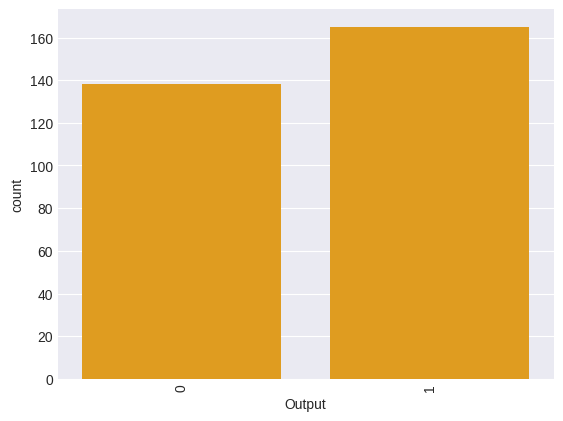

In [23]:
sns.countplot(data=data, x="output", color="orange")
plt.xticks(rotation=90)
plt.xlabel("Output")
plt.show()

**Scatter Pplot of Maximum heart rate as per age**

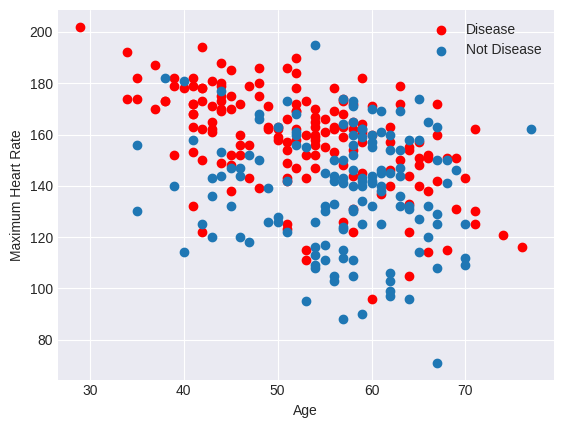

In [24]:
plt.scatter(x=data.age[data.output==1], y=data.thalachh[(data.output==1)], c="red")
plt.scatter(x=data.age[data.output==0], y=data.thalachh[(data.output==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

#MODEL IMPLEMENTATION

**Importing relavent models**

In [25]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
data_len=len(data)

In [27]:
data_len

303

**Creating test data**

In [28]:
test=data[:data_len]
test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5


**Checking for finiteness of data**

In [29]:
data = data[np.isfinite(data).all(1)]

**Creating training labels**

In [30]:
X_train = data.drop(labels = "output", axis = 1)
y_train = data["output"]

In [31]:
y_train = data["output"]
y_train

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


**Splitting the data into train and test**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)

In [33]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 203
X_test 100
y_train 203
y_test 100
test 303


**Standardizing the data**

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

###Logistic Regression

In [35]:
logreg = LogisticRegression()

In [36]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [37]:
acc_log_train = round(logreg.score(X_train,y_train)*100,2)
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: {}% ".format(acc_log_train))
print("Testing Accuracy: {}% ".format(acc_log_test))

Training Accuracy: 88.67% 
Testing Accuracy: 58.0% 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


###Trying other models

1. Decision trees
2. SVM
3. Random Forest Classifier
4. Logistic Regression
5. KNN Classifier

In [38]:
random_state=42

classifier=[DecisionTreeClassifier(random_state=random_state),
           SVC(random_state=random_state),
           RandomForestClassifier(random_state=random_state),
           LogisticRegression(random_state=random_state,solver='lbfgs', max_iter=1000),
           KNeighborsClassifier()]

In [39]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(1,3,5),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [40]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.7785714285714286
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8766666666666667
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8666666666666666
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

0.8519047619047619
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8673809523809524


**Comparision of various classifiers**

In [41]:
cv_result = [i * 100 for i in cv_result]

**Values of various model**

In [42]:
print(cv_result)

[np.float64(77.85714285714286), np.float64(87.66666666666667), np.float64(86.66666666666666), np.float64(85.19047619047619), np.float64(86.73809523809524)]


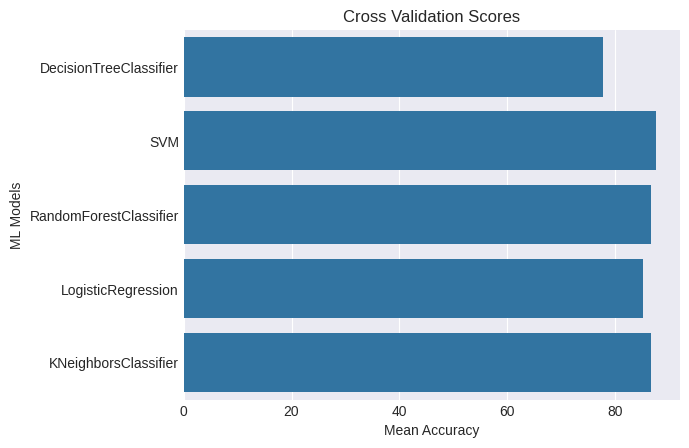

In [43]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier","LogisticRegression","KNeighborsClassifier"]})

g = sns.barplot(x="Cross Validation Means",y="ML Models", data=cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

**CONCLUSION: SVM is giving us the highest accuracy of 87.67%**